VERSIONE UTILIZZANDO K MEANS CLUSTERING


Utilizzando il dataset "Diabetes" disponibile in scikit-learn, sviluppa un modello
di regressione lineare per predire la progressione della malattia del diabete
basandoti sulle dieci misurazioni cliniche fornite.



Istruzioni:

Carica il dataset "Diabetes" utilizzando sklearn.datasets.load_diabetes().
Esplora i dati per comprendere le caratteristiche disponibili e la variabile
target.
Suddividi il dataset in set di training e test.
Crea un modello di regressione lineare utilizzando LinearRegression di scikit-
learn.
Addestra il modello sui dati di training.
Valuta le prestazioni del modello sui dati di test utilizzando metriche
appropriate come l'Errore Quadratico Medio (MSE) e il Coefficiente di
Determinazione (R²).
Analizza i risultati e discuti l'efficacia del modello.

In [30]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.decomposition import PCA

In [31]:
## rubato da https://www.geeksforgeeks.org/sklearn-diabetes-dataset/

# Load the diabetes dataset
diabetes_sklearn = load_diabetes(scaled = False)

# Convert the dataset to a DataFrame
diabetes_df = pd.DataFrame(data = diabetes_sklearn.data, columns = diabetes_sklearn.feature_names)

# Add target variable to the DataFrame
diabetes_df['target'] = diabetes_sklearn.target

print(diabetes_df.head())

# Print the shape of the feature matrix and target vector
print("Shape of Sklearn Diabetes Data:", diabetes_df.shape)

    age  sex   bmi     bp     s1     s2    s3   s4      s5    s6  target
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0   151.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0    75.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0   141.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0   206.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0   135.0
Shape of Sklearn Diabetes Data: (442, 11)


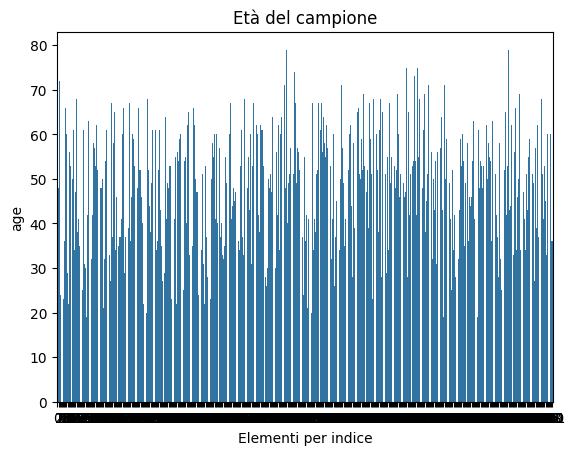

In [32]:
sns.barplot(x = diabetes_df.index, y = "age", data = diabetes_df)
plt.title("Età del campione")
plt.xlabel("Elementi per indice")
plt.show()

In [33]:
print(diabetes_df.head())

    age  sex   bmi     bp     s1     s2    s3   s4      s5    s6  target
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.0  4.8598  87.0   151.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.0  3.8918  69.0    75.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.0  4.6728  85.0   141.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.0  4.8903  89.0   206.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.0  4.2905  80.0   135.0


In [34]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [35]:
X = diabetes_sklearn.data
y = diabetes_sklearn.target

feature_names = diabetes_sklearn.feature_names
target = diabetes_sklearn.target

In [36]:
# Visualizza il numero di campioni per ciascuna classe
class_counts = diabetes_df['target'].value_counts()
print("Numero di campioni per ciascuna classe:")
print(class_counts)

Numero di campioni per ciascuna classe:
target
200.0    6
72.0     6
178.0    5
71.0     5
90.0     5
        ..
146.0    1
212.0    1
120.0    1
183.0    1
57.0     1
Name: count, Length: 214, dtype: int64


In [37]:
# Calcola le statistiche di base delle feature
feature_stats = diabetes_df.describe()
print("\nStatistiche di base delle feature:")
print(feature_stats)


Statistiche di base delle feature:
              age         sex         bmi          bp          s1          s2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               s3          s4          s5          s6      target  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450 

In [38]:
## target represents a quantitative measure of disease progression one year after baseline.

target_min = diabetes_df["target"].min()
target_max = diabetes_df["target"].max()
target_mean = diabetes_df["target"].mean()

print("Minimo del target:" + str(target_min))
print("Massimo del target:" + str(target_max))
print("Mean del target:" + str(target_mean))

Minimo del target:25.0
Massimo del target:346.0
Mean del target:152.13348416289594


In [39]:
## scaler = StandardScaler()
## X_scaled = scaler.fit_transform(X)

In [40]:
## Suddividi il dataset in set di training e test.
## Dividi i dati in 80% training e 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
'''## Crea un modello di regressione lineare utilizzando LinearRegression di scikit-learn.

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)'''

## usiamo invece KMC

from sklearn.cluster import KMeans


# Creazione del modello K-Means
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=42
)

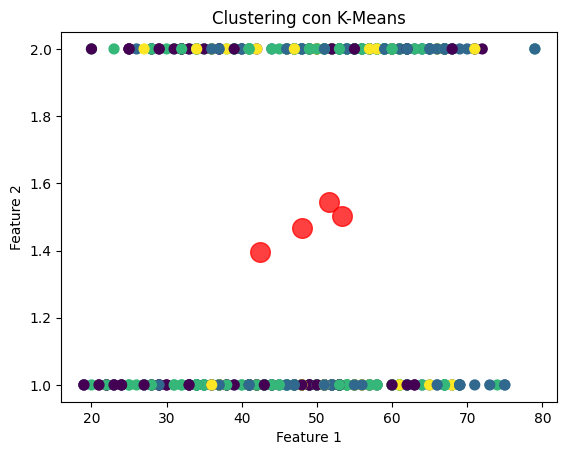

In [42]:
'''## Addestra il modello sui dati di training.
## Inizializza il modello RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 42)
clf.fit(X_train, y_train)'''


# Addestramento del modello
kmeans.fit(X)

# Predizione dei cluster
y_kmeans = kmeans.predict(X)

# Visualizzazione dei cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centri = kmeans.cluster_centers_
plt.scatter(centri[:, 0], centri[:, 1], c='red', s=200, alpha=0.75)
plt.title('Clustering con K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [43]:
'''# Predici le classi sul test set
y_pred = clf.predict(X_test)'''

ypred = y_kmeans

In [44]:
## Valuta le prestazioni del modello sui dati di test utilizzando metriche appropriate
## l'Errore Quadratico Medio (MSE) e il Coefficiente di Determinazione (R²).

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

## Coefficiente di Determinazione (R²)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

4842.247191011236
0.08604973567112562


In [45]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)
from sklearn.model_selection import GridSearchCV


## parametri non ottimizzati
accuracy_opt = accuracy_score(y_test, y_pred)
precision_opt = precision_score(y_test, y_pred, average = 'weighted')
recall_opt = recall_score(y_test, y_pred, average = 'weighted')
f1_opt = f1_score(y_test, y_pred, average = 'weighted')

print("\nPerformance del modello Random Forest Base:")
print(f"Accuratezza: {accuracy_opt:.2f}")
print(f"Precisione: {precision_opt:.2f}")
print(f"Recall: {recall_opt:.2f}")
print(f"F1-score: {f1_opt:.2f}")



# Definisci la griglia di parametri da cercare per l'ottimizzazione
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
'''
# Inizializza GridSearchCV per ottimizzare il modello
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostra i migliori parametri trovati
print("\nMigliori parametri trovati:")
print(grid_search.best_params_)


# Utilizza il miglior modello trovato
best_clf = grid_search.best_estimator_

# Predici sul test set con il modello ottimizzato
y_pred_optimized = best_clf.predict(X_test)

# Calcola le metriche di performance del modello ottimizzato
accuracy_opt = accuracy_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized, average = 'weighted')
recall_opt = recall_score(y_test, y_pred_optimized, average = 'weighted')
f1_opt = f1_score(y_test, y_pred_optimized, average = 'weighted')

print("\nPerformance del modello Random Forest Ottimizzato:")
print(f"Accuratezza: {accuracy_opt:.2f}")
print(f"Precisione: {precision_opt:.2f}")
print(f"Recall: {recall_opt:.2f}")
print(f"F1-score: {f1_opt:.2f}")
'''


Performance del modello Random Forest Base:
Accuratezza: 0.00
Precisione: 0.00
Recall: 0.00
F1-score: 0.00


C:\Users\Rasty\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Rasty\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'\n# Inizializza GridSearchCV per ottimizzare il modello\ngrid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),\n                           param_grid=param_grid, cv=5, scoring=\'accuracy\', n_jobs=-1)\ngrid_search.fit(X_train, y_train)\n\n# Mostra i migliori parametri trovati\nprint("\nMigliori parametri trovati:")\nprint(grid_search.best_params_)\n\n\n# Utilizza il miglior modello trovato\nbest_clf = grid_search.best_estimator_\n\n# Predici sul test set con il modello ottimizzato\ny_pred_optimized = best_clf.predict(X_test)\n\n# Calcola le metriche di performance del modello ottimizzato\naccuracy_opt = accuracy_score(y_test, y_pred_optimized)\nprecision_opt = precision_score(y_test, y_pred_optimized, average = \'weighted\')\nrecall_opt = recall_score(y_test, y_pred_optimized, average = \'weighted\')\nf1_opt = f1_score(y_test, y_pred_optimized, average = \'weighted\')\n\nprint("\nPerformance del modello Random Forest Ottimizzato:")\nprint(f"Accuratezza: {accura

In [46]:
## stesse metriche di prima ma optimized

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred_optimized))

## Coefficiente di Determinazione (R²)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_optimized))

6075.191011235955
-0.14666232671363422


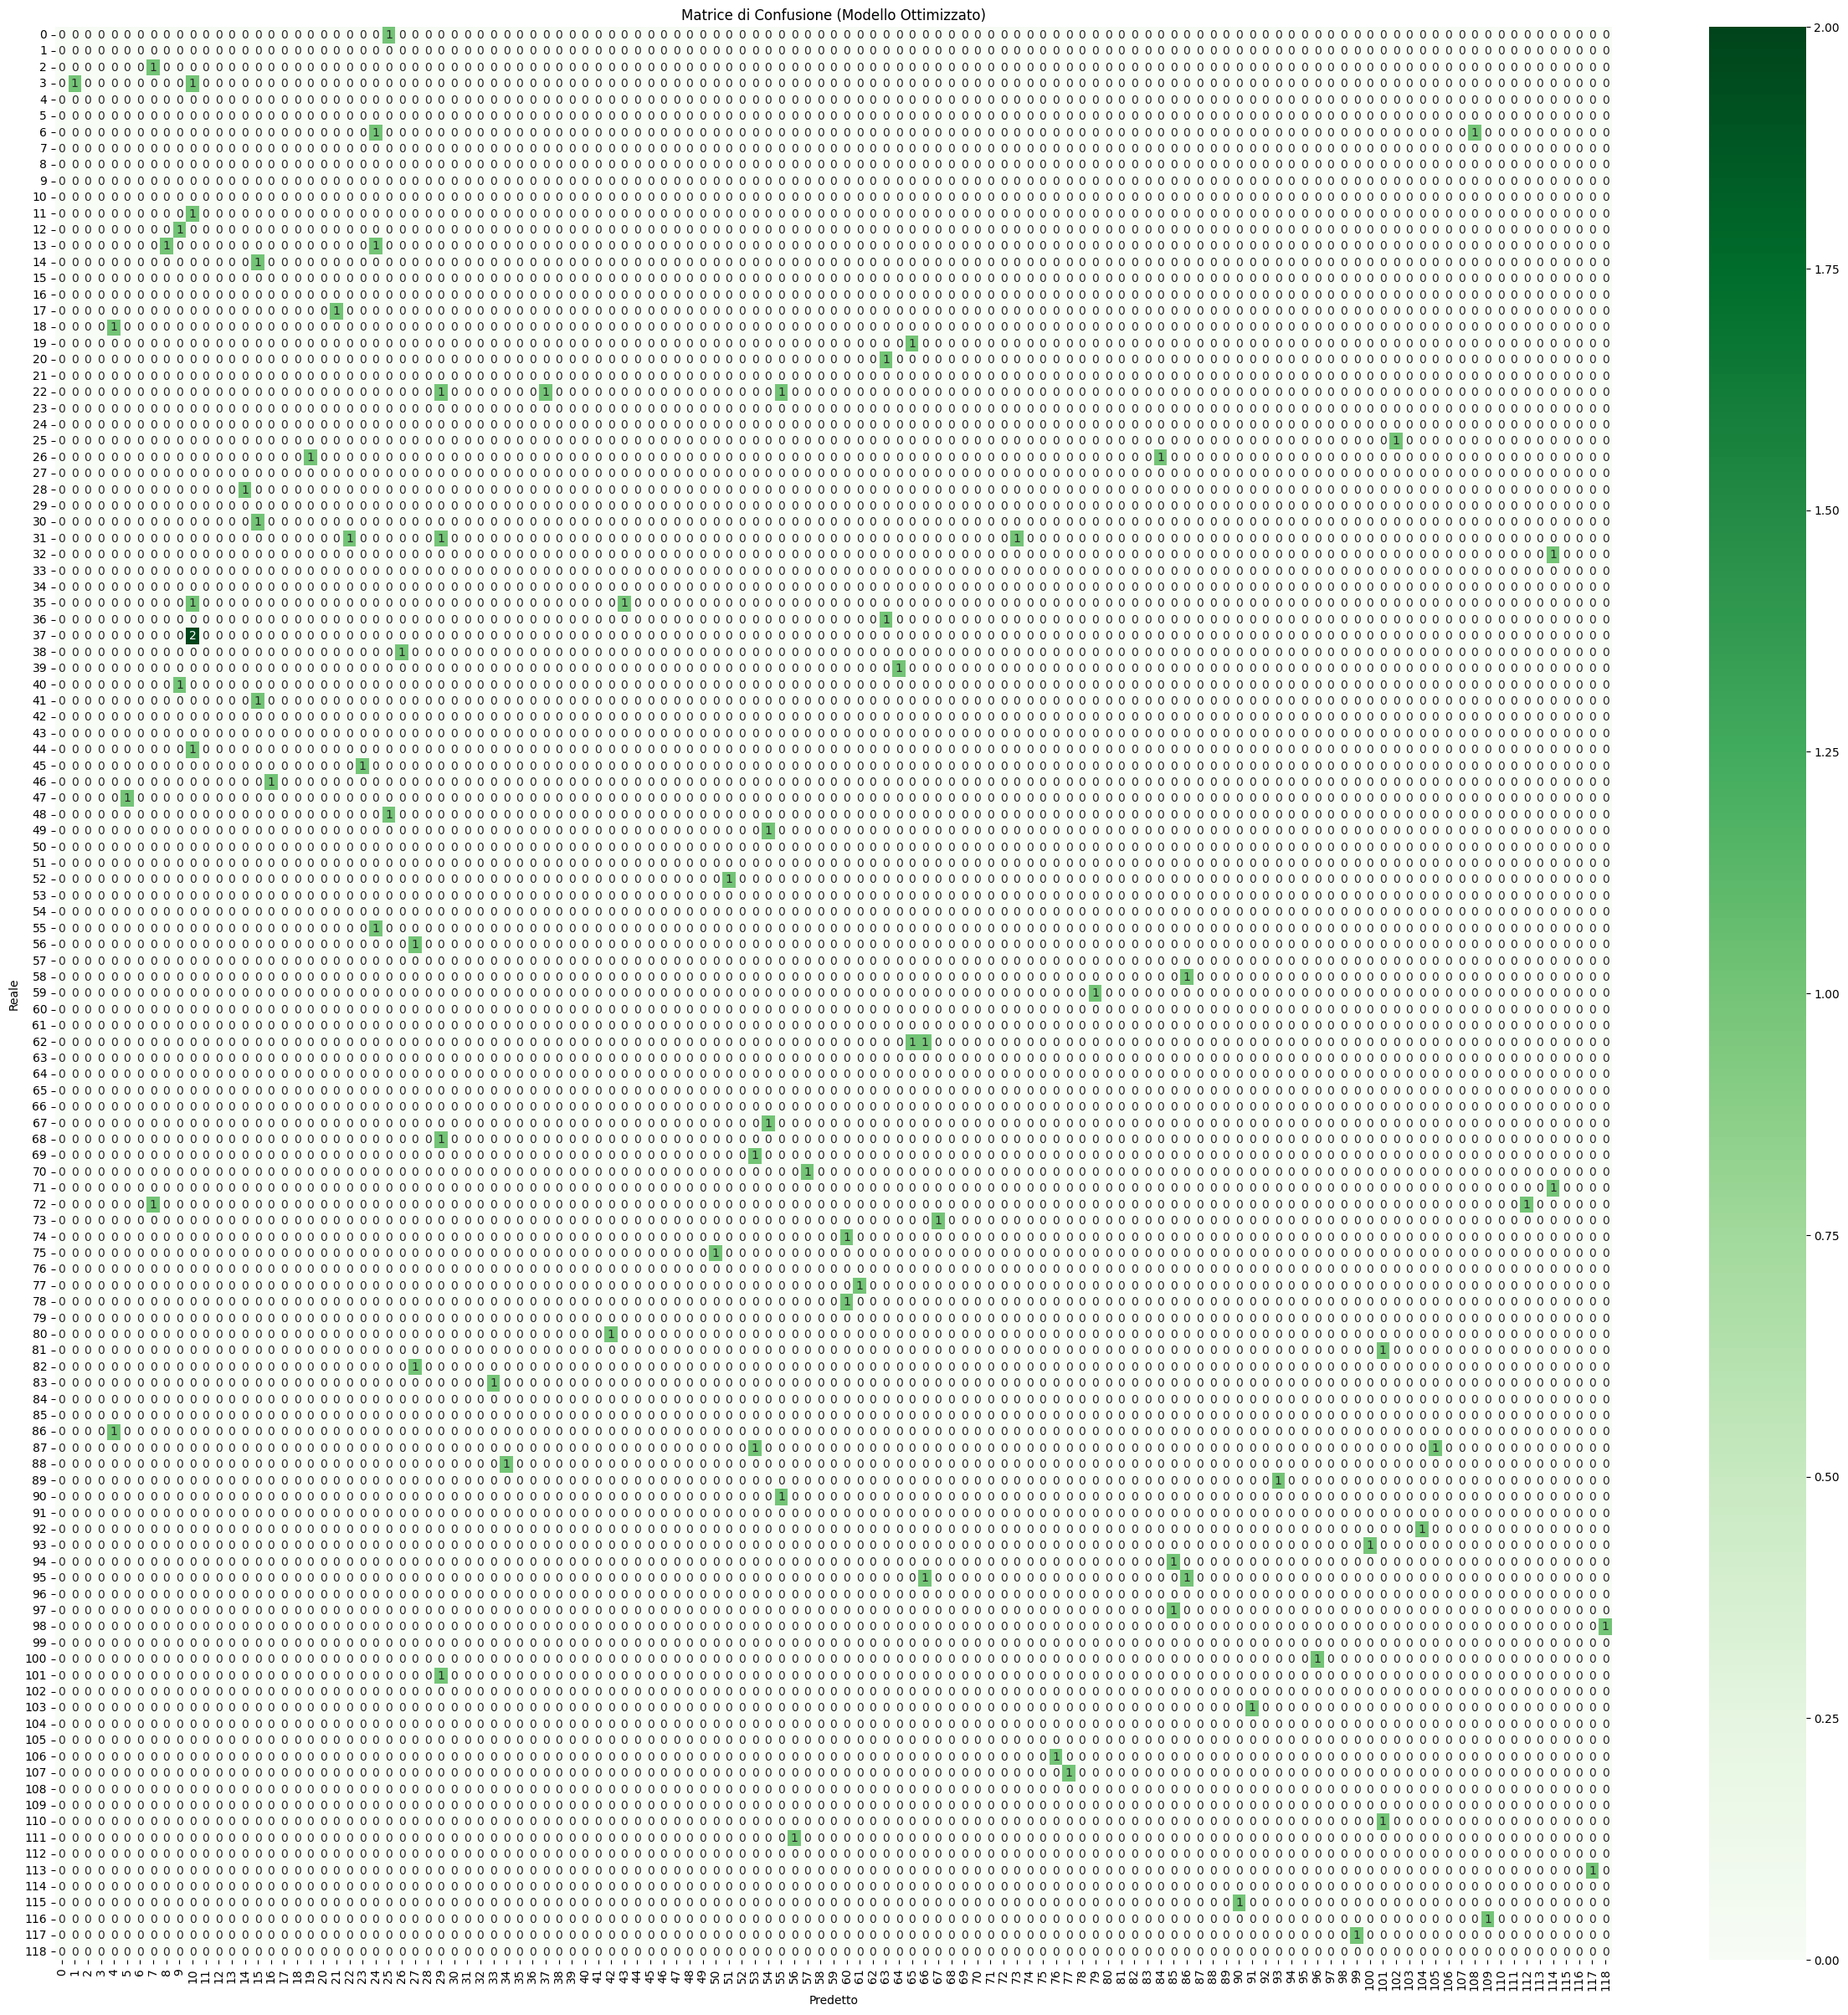

In [47]:
# Genera la matrice di confusione per il modello base
cm_opt = confusion_matrix(y_test, y_pred)

# Visualizza la matrice di confusione del modello base
plt.figure(figsize = (30,30))
sns.heatmap(cm_opt, annot = True, fmt = 'd', cmap = 'Greens')
plt.title('Matrice di Confusione (Modello Ottimizzato)')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.show()

l'ottimizzazione riesce a rimuovere un 2 e 2 valori vicinissimi al centro

In [48]:
'''# Genera la matrice di confusione per il modello ottimizzato
cm_opt = confusion_matrix(y_test, y_pred_optimized)

# Visualizza la matrice di confusione del modello ottimizzato
plt.figure(figsize = (30,30))
sns.heatmap(cm_opt, annot = True, fmt = 'd', cmap = 'Greens')
plt.title('Matrice di Confusione (Modello Ottimizzato)')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.show()'''

"# Genera la matrice di confusione per il modello ottimizzato\ncm_opt = confusion_matrix(y_test, y_pred_optimized)\n\n# Visualizza la matrice di confusione del modello ottimizzato\nplt.figure(figsize = (30,30))\nsns.heatmap(cm_opt, annot = True, fmt = 'd', cmap = 'Greens')\nplt.title('Matrice di Confusione (Modello Ottimizzato)')\nplt.xlabel('Predetto')\nplt.ylabel('Reale')\nplt.show()"